## Lab 6 - Data mining - regression models/ modele de regresie

In [4]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score # performance measures

### Example:  car price estimation (file autoPrice - UCI Machine Learning)/ estimarea prețului unei mașini - setul de date autoPrice.arff

In [5]:
data = arff.loadarff('./datasets/lab6/autoPrice.arff')
df = pd.DataFrame(data[0])

In [6]:
df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,class
0,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
1,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
2,1.0,158.0,105.8,192.7,71.4,55.7,2844.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.0
3,1.0,158.0,105.8,192.7,71.4,55.9,3086.0,131.0,3.13,3.40,8.3,140.0,5500.0,17.0,20.0,23875.0
4,2.0,192.0,101.2,176.8,64.8,54.3,2395.0,108.0,3.50,2.80,8.8,101.0,5800.0,23.0,29.0,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
155,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
156,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
157,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


### Preparing the training and testing datasets / Pregatirea seturilor de antrenare si testare

In [7]:
# remove irrelevant attributes / eliminarea atributelor irelevante
df1=df.drop(['symboling', 'normalized-losses'], axis=1)

In [8]:
# select the predictive attributes / selectarea atributelor de intrare (toate cu exceptia atributului care corespunde pretului)
dfX=df1.drop(['class'], axis=1)

In [9]:
#select the target attribute / selectarea atributului tinta
dfY=df1['class']

In [10]:
#construct the training/testing datasets (70%-30%) / separarea setului de date in subset de antrenare si subset de testare (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(
    dfX, dfY, test_size=0.3, random_state=42)

### 1. Reminder: Linear Regression / Regresie liniară

In [8]:
from sklearn import datasets, linear_model   # linear regression models
# model definition / definirea modelului
LR_model = linear_model.LinearRegression()

# model training / antrenarea modelului
LR_model = LR_model.fit(X_train, y_train)

In [9]:
# visualization of the coefficients / vizualizarea coeficientilor
print('Coefficients: \n', LR_model.coef_)

Coefficients: 
 [ 3.38275516e+02 -1.19147043e+02  7.13474052e+02 -2.22985032e+02
  4.37651365e+00  7.42636055e+01 -2.96288804e+03 -2.22551230e+03
  1.14099605e+02  9.96998338e+00  4.70934925e-01 -6.35522791e+01
  5.81635590e+00]


In [10]:
# prediction Linear Regression / utilizarea modelului 
y_pred = LR_model.predict(X_test)

# Mean squared error / Eroare medie patratica
print('Mean squared error: %.2f'  % mean_squared_error(y_test, y_pred))

# Coefficient of determination - values in [-1,1], 1 corresponds to perfect prediction / Coeficient de determinare - valori in [-1,1], 1 corespunde unei predictii perfecte
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 6373553.57
Coefficient of determination: 0.77


### Exercise 1.  Linear Regression / Exercitiu 1. Regresie liniara:  
#### rank the car attributes based on their influence on the price /  ierarhizati atributele in functie de influenta asupra pretului

In [34]:
print(dfX.columns)
print(LR_model.coef_)

print(dfX.columns)
# width positive and bore negative
dfX.corr()

Index(['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg'],
      dtype='object')
[ 3.38275516e+02 -1.19147043e+02  7.13474052e+02 -2.22985032e+02
  4.37651365e+00  7.42636055e+01 -2.96288804e+03 -2.22551230e+03
  1.14099605e+02  9.96998338e+00  4.70934925e-01 -6.35522791e+01
  5.81635590e+00]
Index(['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg'],
      dtype='object')


,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
wheel-base,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750
length,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,0.184814,0.672063,-0.234074,-0.724544,-0.724599
width,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,0.258752,0.681872,-0.232216,-0.666684,-0.693339
height,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,0.233308,0.034317,-0.245864,-0.199737,-0.226136
curb-weight,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,0.224724,0.790095,-0.259988,-0.762155,-0.789338
engine-size,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,0.141097,0.812073,-0.284686,-0.699139,-0.714095
bore,0.578159,0.646318,0.572554,0.254836,0.645792,0.595737,1.000000,-0.102581,0.015119,0.560239,-0.312269,-0.590440,-0.590850
stroke,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,-0.102581,1.000000,0.243587,0.148804,-0.011312,-0.020055,-0.012934
compression-ratio,0.291431,0.184814,0.258752,0.233308,0.224724,0.141097,0.015119,0.243587,1.000000,-0.162305,-0.416769,0.278332,0.221483
horsepower,0.516948,0.672063,0.681872,0.034317,0.790095,0.812073,0.560239,0.148804,-0.162305,1.000000,0.074057,-0.837214,-0.827941


## 2. Regression Trees / Arbori de regresie

In [11]:
# Regression tree / Arbore de regresie

from sklearn import tree  # regression trees
# default values of the parameters  / valori implicite ale parametrilor
# see https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

RT_model = tree.DecisionTreeRegressor()   
RT_model = RT_model.fit(X_train, y_train)

In [12]:
# prediction Regression Tree / utilizare arbore de regresie
y_pred_RT = RT_model.predict(X_test)

# Mean squared error
print('Mean squared error: %.2f'  % mean_squared_error(y_test, y_pred_RT))
# Coefficient of determination
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_RT))

Mean squared error: 9921483.82
Coefficient of determination: 0.63


### Exercise 2.  Regression Tree:  analyze the influence of  /  Exercitiu 2. Analizati influenta
#### (a)  the maximal depth of the tree (max_depth)  / adancimii maxime a arborelui
#### (b)  the split criterion (criterion, splitter) / criteriului de partitionare


In [37]:
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best', 'random']

for m in range(2, 6):
    for c in criterion:
        for s in splitter:
            RT_model = tree.DecisionTreeRegressor(criterion=c, splitter=s)
            RT_model = RT_model.fit(X_train, y_train)
            y_pred_RT = RT_model.predict(X_test)
            # Mean squared error
            print('Mean squared error: %.2f'  % mean_squared_error(y_test, y_pred_RT))
            # Coefficient of determination
            print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_RT))
            print(f'Criterion: {c}, Splitter: {s}')
            print(f'min_samples_split: {m}')
            print('-------------------------')

Mean squared error: 9420264.34
Coefficient of determination: 0.65
Criterion: squared_error, Splitter: best
min_samples_split: 2
-------------------------
Mean squared error: 4955420.29
Coefficient of determination: 0.82
Criterion: squared_error, Splitter: random
min_samples_split: 2
-------------------------
Mean squared error: 10044850.28
Coefficient of determination: 0.63
Criterion: friedman_mse, Splitter: best
min_samples_split: 2
-------------------------
Mean squared error: 4353737.62
Coefficient of determination: 0.84
Criterion: friedman_mse, Splitter: random
min_samples_split: 2
-------------------------
Mean squared error: 7369690.39
Coefficient of determination: 0.73
Criterion: absolute_error, Splitter: best
min_samples_split: 2
-------------------------
Mean squared error: 6668381.01
Coefficient of determination: 0.75
Criterion: absolute_error, Splitter: random
min_samples_split: 2
-------------------------
Mean squared error: 10397238.29
Coefficient of determination: 0.62
Cr

## 3. Support Vector Regression / Regresie bazată pe vectori suport

In [13]:
# Support vector regression
from sklearn import svm  # support vector machines
# default values of the parameters  / valori implicite ale parametrilor
# see https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR

SVR_model = svm.SVR(kernel='linear')   
SVR_model = SVR_model.fit(X_train, y_train)

In [14]:
# prediction Support Vector Regressor / utilizare model de tip Support Vector Regressor
y_pred_SVR = SVR_model.predict(X_test)

# Mean squared error
print('Mean squared error: %.2f'  % mean_squared_error(y_test, y_pred_SVR))
# Coefficient of determination
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_SVR))

Mean squared error: 4652170.98
Coefficient of determination: 0.83


### Exercise 3.  SVR:  analyze the influence of  / Exercitiu 3.  SVR: Analizati influenta
#### (a) the kernel function / functiei nucleu
#### (b) the regularization parameter (C) / parametrului de regularizare (C)

In [40]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [2, 3]
C = [1, 2, 3, 5, 10]
gamma = ['scale', 'auto']

for d in degree:
    for g in gamma:
        for k in kernel:
            for c in range(1, 5):
                SVR_model = svm.SVR(kernel=k, gamma=g, C=c, degree=d)   
                SVR_model = SVR_model.fit(X_train, y_train)
                y_pred_SVR = SVR_model.predict(X_test)
                print('Mean squared error: %.2f'  % mean_squared_error(y_test, y_pred_SVR))
                # Coefficient of determination
                print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_SVR))
                print(f'Degree: {d}, Gamma: {g}, Kernel: {k}, C: {c}')

Mean squared error: 4652170.98
Coefficient of determination: 0.83
Degree: 2, Gamma: scale, Kernel: linear, C: 1
Mean squared error: 4881503.55
Coefficient of determination: 0.82
Degree: 2, Gamma: scale, Kernel: linear, C: 2
Mean squared error: 4992755.20
Coefficient of determination: 0.82
Degree: 2, Gamma: scale, Kernel: linear, C: 3
Mean squared error: 5022771.80
Coefficient of determination: 0.82
Degree: 2, Gamma: scale, Kernel: linear, C: 4
Mean squared error: 33808197.36
Coefficient of determination: -0.24
Degree: 2, Gamma: scale, Kernel: poly, C: 1
Mean squared error: 33785701.17
Coefficient of determination: -0.24
Degree: 2, Gamma: scale, Kernel: poly, C: 2
Mean squared error: 33761817.39
Coefficient of determination: -0.24
Degree: 2, Gamma: scale, Kernel: poly, C: 3
Mean squared error: 33737943.29
Coefficient of determination: -0.24
Degree: 2, Gamma: scale, Kernel: poly, C: 4
Mean squared error: 33814371.98
Coefficient of determination: -0.24
Degree: 2, Gamma: scale, Kernel: rbf

## 4. k Nearest Neighbor Regression / Regresie bazata pe cei mai apropiati vecini

In [11]:
# kNN
from sklearn import neighbors # kNN
# default values of the parameters  / valori implicite ale parametrilor
# see https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

kNN_model = neighbors.KNeighborsRegressor()   
kNN_model = kNN_model.fit(X_train, y_train)

In [12]:
# prediction kNN Regressor / utilizare regresie bazata pe cei mai apropiati vecini
y_pred_kNN = kNN_model.predict(X_test)

# Mean squared error
print('Mean squared error: %.2f'  % mean_squared_error(y_test, y_pred_kNN))
# Coefficient of determination
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_kNN))

Mean squared error: 5089728.16
Coefficient of determination: 0.81


### Exercise 4.  kNN:  analyze the influence of  / Exercitiu 4. Analizati influenta
#### (a)  the number of neighbours / numărului de vecini
#### (b)  the weights computation / modului de calcul a ponderilor

In [14]:
KNN = [1, 2, 3, 5, 10, 20, 25]
weights = ['uniform', 'distance']

for k in KNN:
    for w in weights:
        kNN_model = neighbors.KNeighborsRegressor(n_neighbors=k, weights=w)   
        kNN_model = kNN_model.fit(X_train, y_train)
        y_pred_kNN = kNN_model.predict(X_test)
        print('Mean squared error: %.2f'  % mean_squared_error(y_test, y_pred_kNN))
        print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_kNN))
        print(f'Neighbours: {k}, Weight: {w}')


Mean squared error: 5484291.62
Coefficient of determination: 0.80
Neighbours: 1, Weight: uniform
Mean squared error: 5484291.62
Coefficient of determination: 0.80
Neighbours: 1, Weight: distance
Mean squared error: 6863517.59
Coefficient of determination: 0.75
Neighbours: 2, Weight: uniform
Mean squared error: 4668577.36
Coefficient of determination: 0.83
Neighbours: 2, Weight: distance
Mean squared error: 6581401.36
Coefficient of determination: 0.76
Neighbours: 3, Weight: uniform
Mean squared error: 4222267.81
Coefficient of determination: 0.84
Neighbours: 3, Weight: distance
Mean squared error: 5089728.16
Coefficient of determination: 0.81
Neighbours: 5, Weight: uniform
Mean squared error: 3769074.93
Coefficient of determination: 0.86
Neighbours: 5, Weight: distance
Mean squared error: 4763505.35
Coefficient of determination: 0.82
Neighbours: 10, Weight: uniform
Mean squared error: 3460155.04
Coefficient of determination: 0.87
Neighbours: 10, Weight: distance
Mean squared error: 486

## 5. Multilayer Perceptron / Rețea neuronală feedforward

In [17]:
from sklearn.neural_network import MLPRegressor
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

MLP_model = MLPRegressor()   
MLP_model = MLP_model.fit(X_train, y_train)

/home/mihai/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
# prediction MLP / utilizare retea neuronala
y_pred_MLP = MLP_model.predict(X_test)

# Mean squared error
print('Mean squared error: %.2f'  % mean_squared_error(y_test, y_pred_MLP))
# Coefficient of determination: 
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_MLP))

Mean squared error: 21806026.04
Coefficient of determination: 0.20


### Exercise 5. MLP:  analyze the influence of the / Exercitiu 5. Analizati influenta următoarelor aspecte
#### (a) input data standardization/ standardizarea datelor de intrare
#### (b) number of hidden units/ numărul de unități ascunse
#### (c) activation function / funcția de activare

In [ ]:
...

## 6. RBF network / retele cu functii de activare cu simetrie radiala


In [19]:
#Source: https://github.com/ameerezae/RBF-Network/blob/master/RBF.ipynb
import numpy as np
import matplotlib.pyplot as plt
import random

class RBF(object):

    def __init__(self, shape, sigma=0.5):
        self.shape = shape  # number of hidden units
        self.sigma = sigma  # receptive field width parameter
        self.centers = None  # matrix of centers
        self.weights = None  # matrix of weights
        
    # Gaussian radial basis function / funcția de activare de la nivelul ascuns - gaussiană
    def gaussian_kernel(self, center, data_point):
        return np.exp(-1 * self.sigma * (np.linalg.norm(center - data_point) ** 2))
    
    # computation of the values generated by the hidden units/ calculul valorilor produse de nivelul ascuns
    def interpolation_matrix(self, X):
        matrix = np.zeros(len(X) * self.shape)
        counter = 0
        for inp in X:
            for center in self.centers:
                kernel = self.gaussian_kernel(center, inp)
                matrix[counter] = kernel
                counter += 1
        return matrix.reshape(len(X), self.shape)
    
    # random selection of the centers from the input dataset/ selecție aleatoare a centrilor din setul de intrare
    def select_centers(self, X):
        centers = []
        random_indices = random.sample(range(0, len(X)), self.shape)
        for rnd in random_indices:
            centers.append(X[rnd])
        return np.array(centers)
    
    # training
    def fit(self, X, Y):
        self.centers = self.select_centers(X)  # selection of centers
        im = self.interpolation_matrix(X)      # computation of the values corresponding to the hidden units
        self.weights = np.dot(np.linalg.pinv(im), Y) # computation of the weights of connections between hidden and output layers (using the pseudoinverse)
    
    # prediction
    def predict(self, X):
        im = self.interpolation_matrix(X)
        predictions = np.dot(im, self.weights)
        return predictions


In [20]:
# training
x_train_RBF = np.arange(-6.3, 6.3, 0.5)
y_train_RBF = np.sin(x_train_RBF)

RBFN = RBF(shape=5, sigma=0.1)  # 5 hidden units and width parameter equal to 0.1
RBFN.fit(x_train_RBF, y_train_RBF)
y_pred_RBF = RBFN.predict(x_train_RBF)

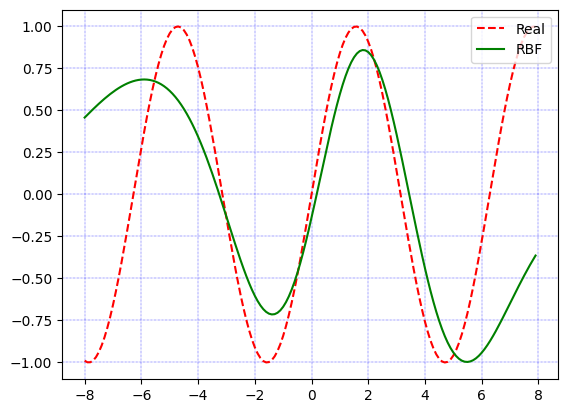

In [21]:
x_train_compare = np.arange(-8, 8, 0.1)

RBF_prediction = RBFN.predict(x_train_compare)

real_values = np.sin(x_train_compare)

plt.plot(x_train_compare, real_values, 'r--', label='Real')
#plt.plot(x_train_compare, MLP_prediction, 'b-', label='MLP')
plt.plot(x_train_compare, RBF_prediction, 'g-', label='RBF')

plt.legend(loc='upper right')
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.savefig('compare.png')
plt.show()

### Exercise RBF:  analyze the influence of the / analizați influența:
* number of hidden units/ numărului de unități ascunse
* value of the kernel width (sigma parameter)/ valorii lui sigma

#### Other examples of RBF implementation:   https://github.com/artisan1218/RBF-Network/blob/main/RBF_Network.ipynb,  https://github.com/rssalessio/PytorchRBFLayer